In [18]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [19]:
#importing dataset
df=pd.read_csv('diabetes_dataset.csv')
df['Outcome'].value_counts()


,count
Outcome,
0,500
1,268


In [20]:
#correlation
corr=df.corr()


<Axes: >

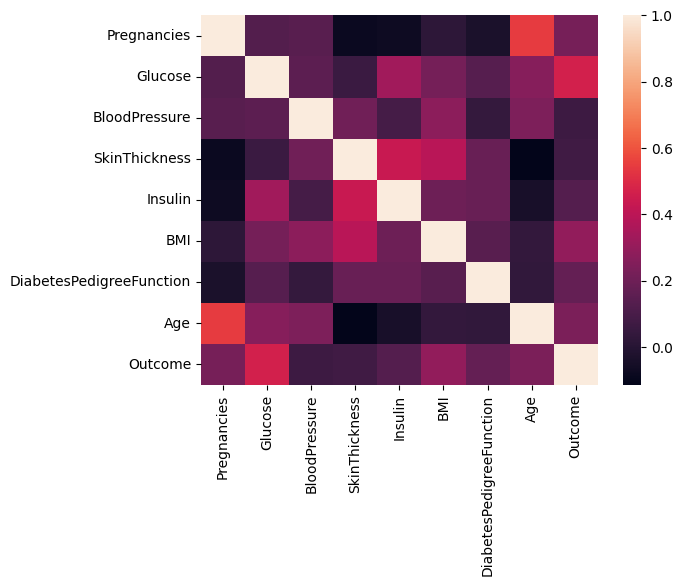

In [21]:
#visualize the correlation using heatmap
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns)


In [22]:
x=df.drop(columns=['Outcome'])
y=df['Outcome']


In [23]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [25]:
# Build the model
model = keras.Sequential([
    layers.Dense(40, activation='relu', input_shape=(8,)),
    layers.Dense(20,activation="relu"),
    layers.Dense(15,activation="relu"),
    layers.Dense(10, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
#Compile the model
model.compile(optimizer='adam', loss=BinaryCrossentropy(), metrics=['accuracy'])

In [27]:
#Train the model
model.fit(x_train_scaled, y_train, epochs=100, validation_data=(x_test_scaled, y_test), verbose= 0)

In [28]:
#prediction
y_pred = (model.predict(x_test_scaled) > 0.5).astype('int32')


1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


In [29]:
#find accuracy value
accuracy = accuracy_score(y_test, y_pred)
print(f'Model Accuracy: {accuracy * 100:.2f}%')


Model Accuracy: 72.73%
